In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
toyota_data=pd.read_csv("/content/sample_data/ToyotaCorolla.csv", encoding= 'unicode_escape')


In [ ]:
toyota_data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


# EDA analysis

In [ ]:
toyota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [ ]:
#above columns are to be considered
toyota_one=pd.concat([toyota_data.iloc[:,2:4],toyota_data.iloc[:,6:7],toyota_data.iloc[:,8:9],toyota_data.iloc[:,12:14],toyota_data.iloc[:,15:18]],axis=1)
toyota_one.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [ ]:
toyota_two=toyota_one.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_two.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [ ]:
#check for duplicated data
toyota_two[toyota_two.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyota_two.shape

(1436, 9)

In [ ]:
#drop the duplicated column
toyta3=toyota_two.drop_duplicates().reset_index(drop=True)
toyta3.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [ ]:
toyta3.shape

(1435, 9)

In [ ]:
toyta3.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
CC,1435.0,1576.560976,424.387533,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026481,0.188575,3.0,5.0,5.0,5.0,6.0
QT,1435.0,87.020209,40.959588,19.0,69.0,85.0,85.0,283.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


In [ ]:
toyta3.isna().sum() # there is no null column

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [ ]:
toyta3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


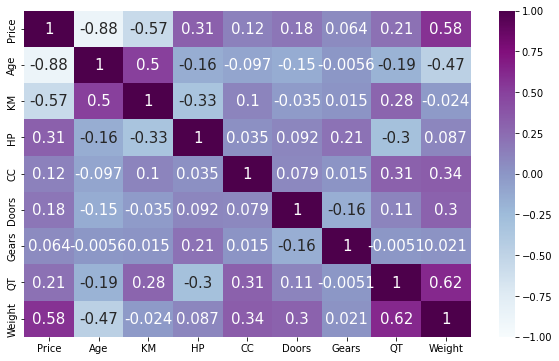

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(toyta3.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 15});

# Model_Building

In [ ]:
formula='Price~Age+KM+HP+CC+Doors+Gears+QT+Weight'
model_one=smf.ols(formula,toyta3).fit()
model_one.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
model_one.rsquared , model_one.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [ ]:
model_one.tvalues , np.round(model_one.pvalues,4)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64, Intercept    0.0001
 Age          0.0000
 KM           0.0000
 HP           0.0000
 CC           0.1882
 Doors        0.9816
 Gears        0.0025
 QT           0.0033
 Weight       0.0000
 dtype: float64)

In [ ]:
#lets build models SLR and MLR for insignificant variables 'CC > 0.05' and 'Doors > 0.05'


In [ ]:
model_CC=smf.ols('Price~CC',toyta3).fit()
model_CC.tvalues,model_CC.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [ ]:
model_Doors=smf.ols('Price~Doors',toyta3).fit()
model_Doors.tvalues,model_Doors.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
model_CC_Doors=smf.ols('Price~CC+Doors',toyta3).fit()
model_CC_Doors.tvalues,model_CC_Doors.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

Model validation 1:VIF analysis (colinearity check ) 2: residual analysis

In [ ]:
#colinerity check
for i in toyta3.columns:
  print(i)

Price
Age
KM
HP
CC
Doors
Gears
QT
Weight


In [ ]:
rsq_AG=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',toyta3).fit().rsquared
vif_AG=1/(1-rsq_AG)
rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',toyta3).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',toyta3).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_CC=smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',toyta3).fit().rsquared
vif_CC=1/(1-rsq_CC)
rsq_DR=smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',toyta3).fit().rsquared
vif_DR=1/(1-rsq_DR)
rsq_GR=smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',toyta3).fit().rsquared
vif_GR=1/(1-rsq_GR)
rsq_QT=smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',toyta3).fit().rsquared
vif_QT=1/(1-rsq_QT)
rsq_Wt=smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',toyta3).fit().rsquared
vif_Wt=1/(1-rsq_Wt)

#putting all VIF values in DataFrame
d1={'variables':['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'],'Vif':[vif_AG,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_Wt]}
df=pd.DataFrame(d1)
df


,variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


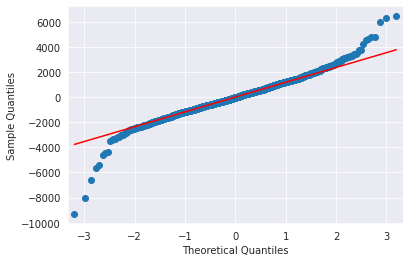

In [ ]:
#fom above observation it is found that 1<VIF<5 — features are moderately correlated
#lets go for residual analysis
sm.qqplot(model_one.resid,line='q')
plt.show()

In [ ]:
#check the outliers
list[np.where(model_one.resid > 6000)]

list[array([109, 146, 522])]

In [ ]:
list[np.where(model_one.resid < -6000)]

list[array([220, 600, 959])]

In [ ]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standarad_values(vals):
  return (vals-vals.mean())/vals.std()

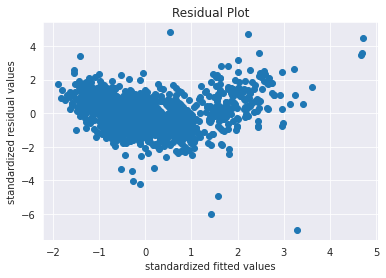

In [ ]:
plt.scatter(standarad_values(model_one.fittedvalues),standar_values(model_one.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)

 residuals regression plot for Age
eval_env: 1


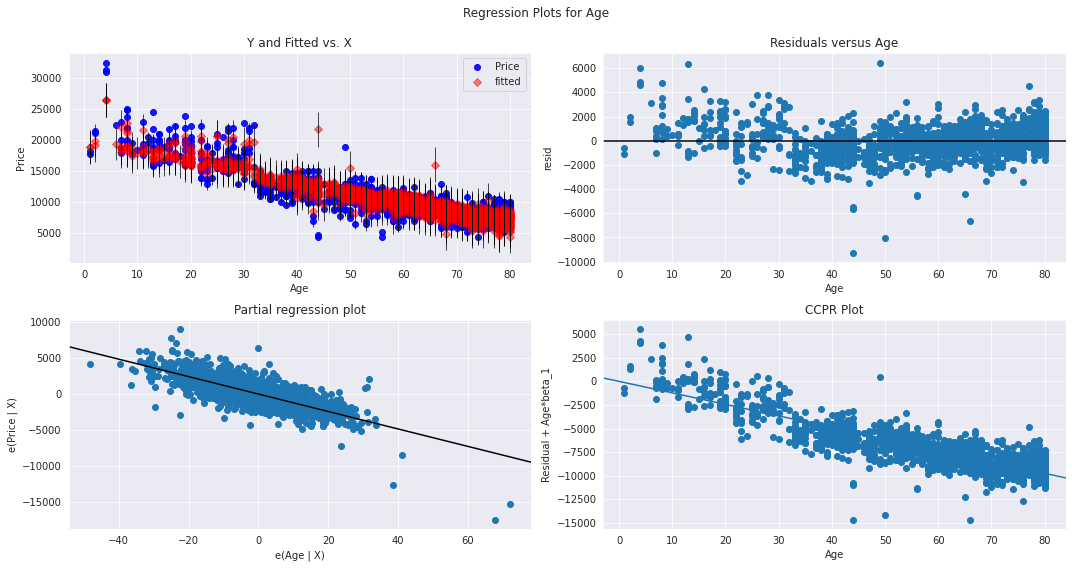

***************************************
 residuals regression plot for KM
eval_env: 1


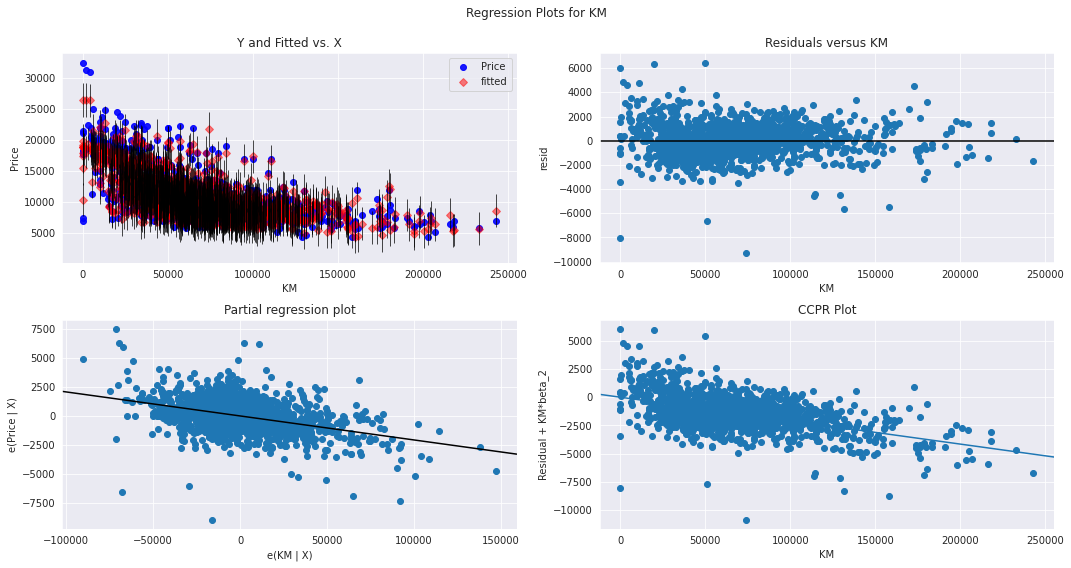

***************************************
 residuals regression plot for HP
eval_env: 1


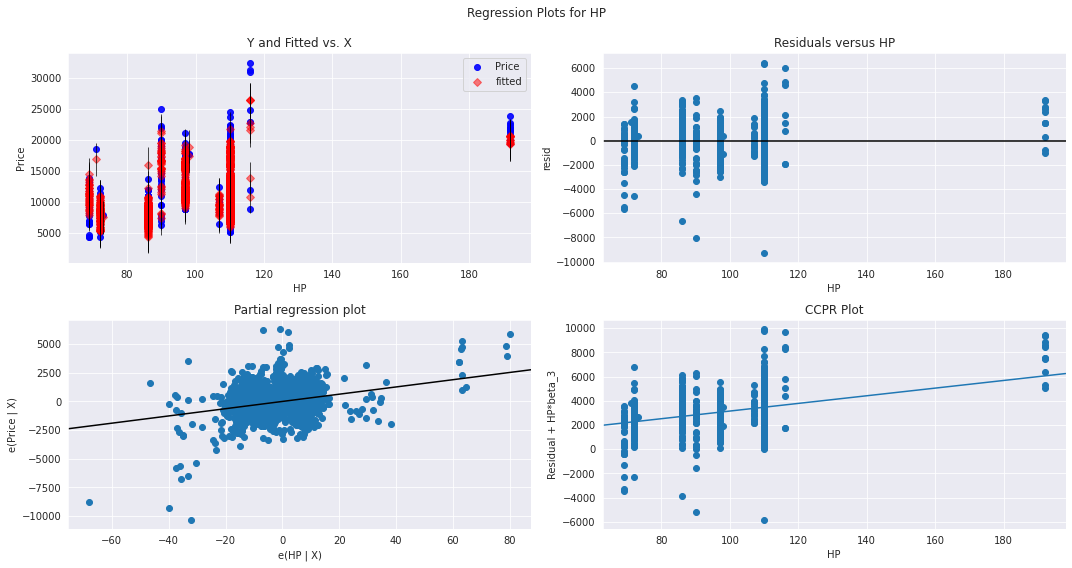

***************************************
 residuals regression plot for CC
eval_env: 1


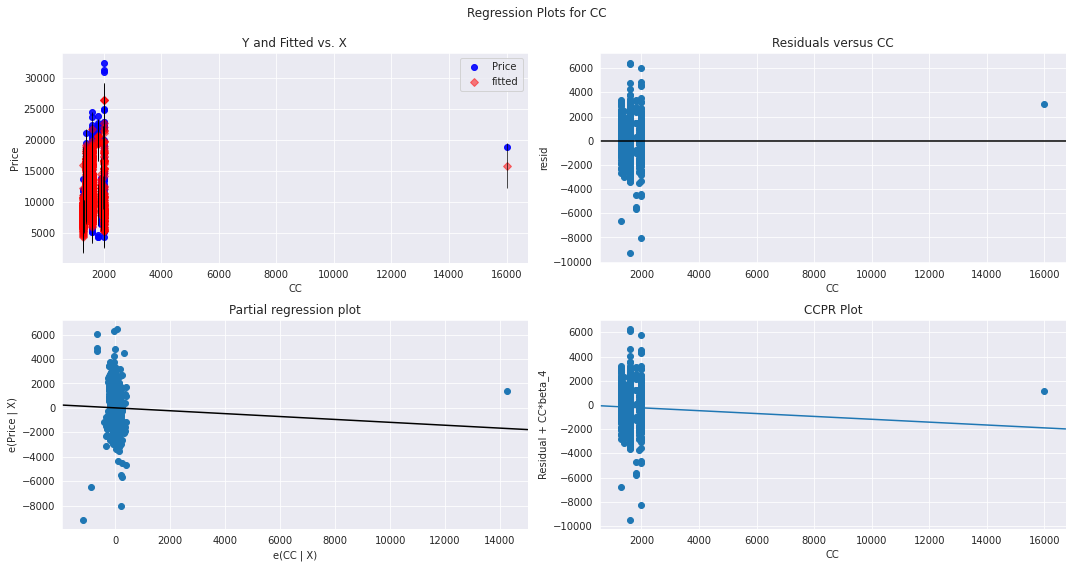

***************************************
 residuals regression plot for Doors
eval_env: 1


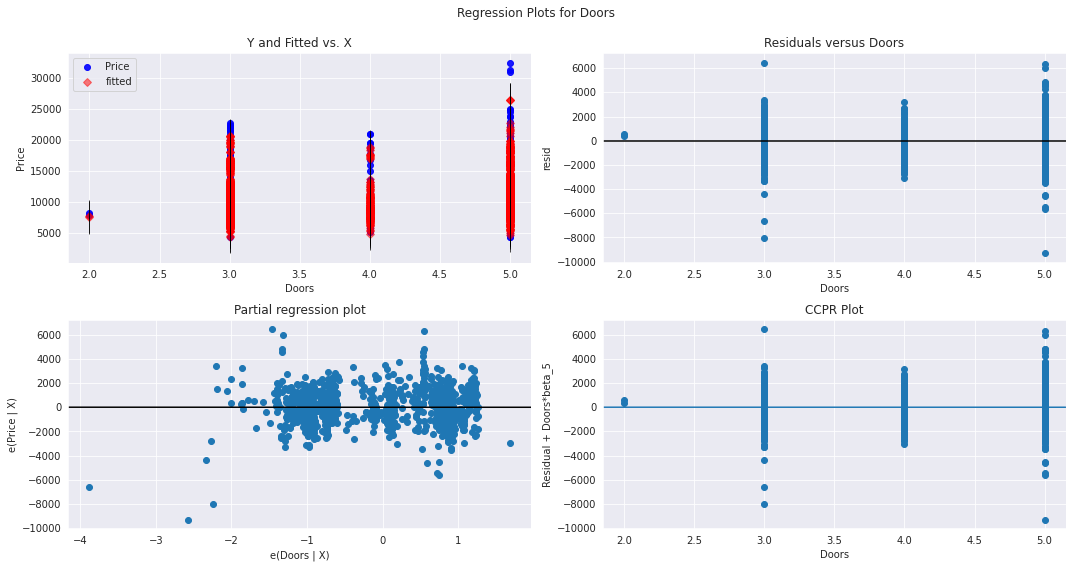

***************************************
 residuals regression plot for Gears
eval_env: 1


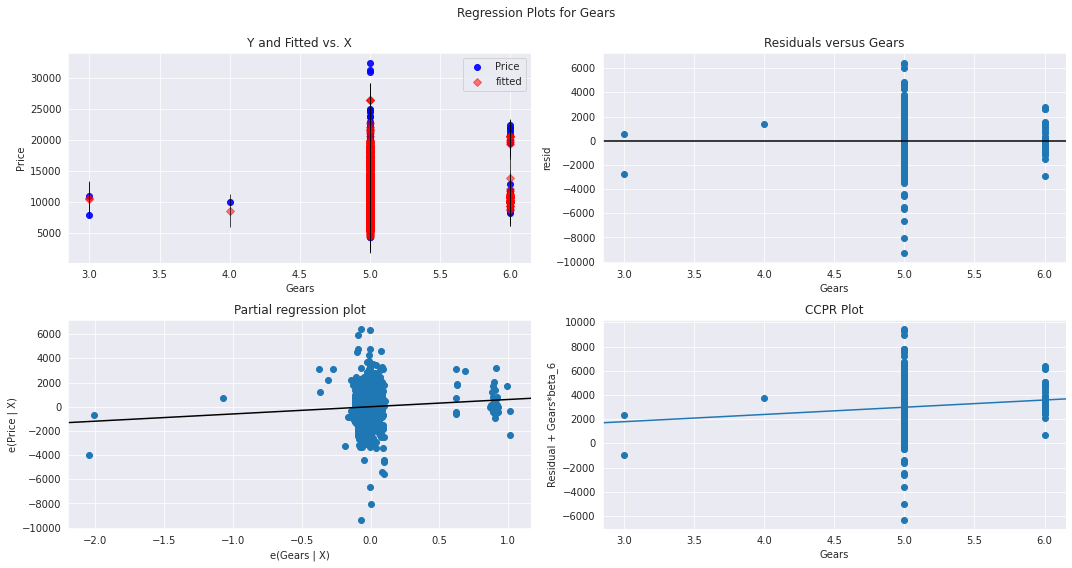

***************************************
 residuals regression plot for QT
eval_env: 1


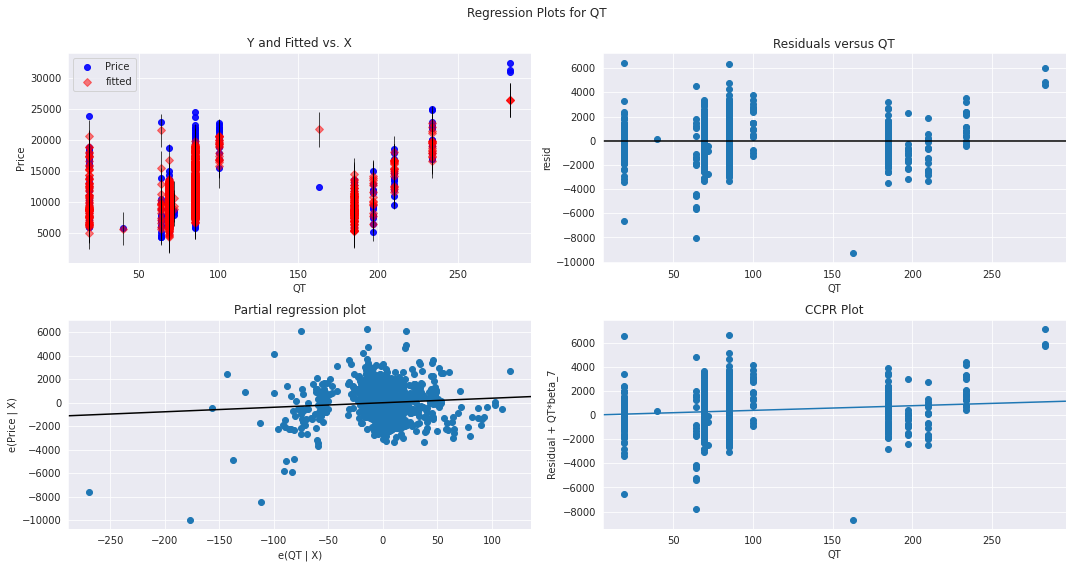

***************************************
 residuals regression plot for Weight
eval_env: 1


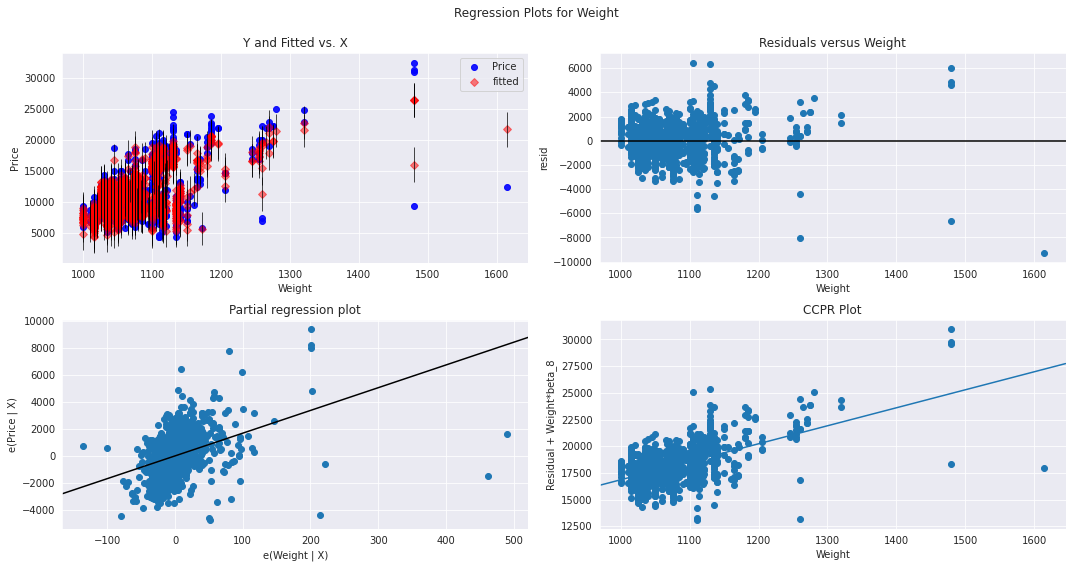

***************************************


In [ ]:

for i in toyta3.columns:
  if i!='Price':
    fig=plt.figure(figsize=(15,8))
    print(" residuals regression plot for {}".format(i))
    sm.graphics.plot_regress_exog(model_one,i,fig=fig)
    plt.show()
    print("***************************************")

# Model deletion diagnostics (cooks distance , leverage value)

In [ ]:
#If Cook's distance > 1, then it's an outlier
(c,_)=model_one.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

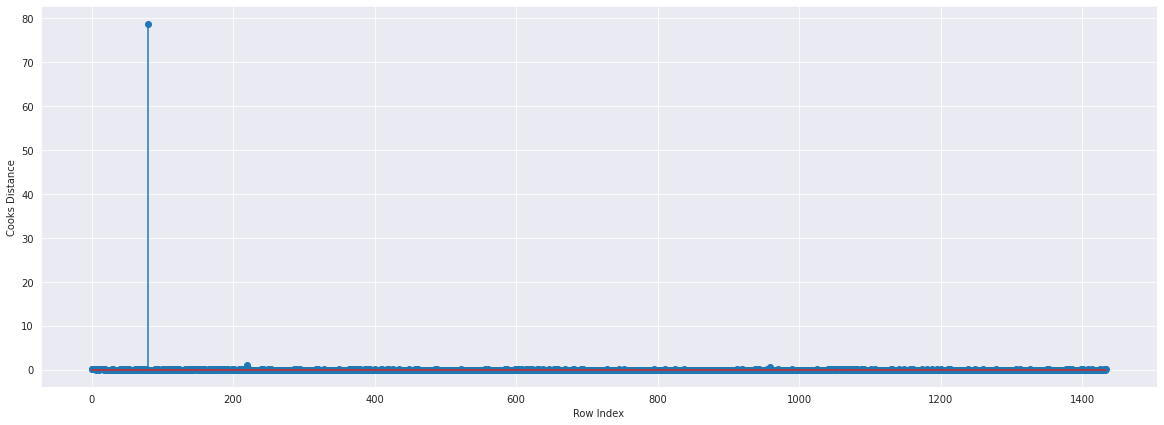

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyta3)),np.round(c,4))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Index and value of influencer 
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

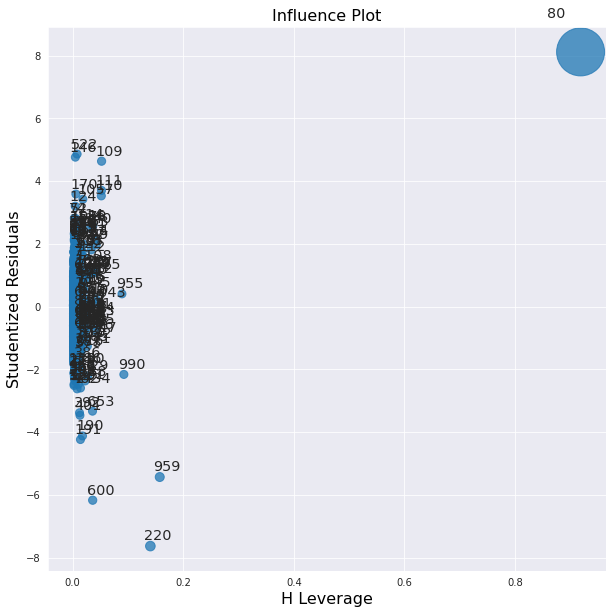

In [ ]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model_one,ax=ax)

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of columns & n = no of rows
k=toyta3.shape[1]
n=toyta3.shape[0]
lev_val=3*(k+1)/n
lev_val

0.020905923344947737

In [ ]:
toyta3[toyta3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Model improvement

In [ ]:
#lets discard the outlier and keep the in new variable
toyota_new=toyta3.drop(toyta3.index[[80]],axis=0).reset_index(drop=True)
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model deletion diagnostics

In [ ]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_new).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota_new=toyota_new.drop(toyota_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota_new
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_new).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [ ]:
final_model.rsquared, final_model.rsquared_adj

(0.8882395145171204, 0.8876107635439396)

# Model prediction

In [ ]:
# lets data for prediction be 
new_data=pd.DataFrame({'Age':1,"KM":30000,"HP":90,"CC":1200,"Doors":3,"Gears":4,"QT":70,"Weight":1010},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1,30000,90,1200,3,4,70,1010


In [ ]:
data_pred=final_model.predict(new_data)
data_pred

0    16056.28374
dtype: float64

In [ ]:
pred_y=final_model.predict(toyota_new)

In [ ]:
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64